## Imports

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.segmentation import disk_level_set
import os

## Paths

In [3]:
IMG_PATH = r'C:/Users/ginof/OneDrive - ITU/Documentos/GitHub/fyp2021p3g03/data/example_image/'
SEG_PATH = r'C:/Users/ginof/OneDrive - ITU/Documentos/GitHub/fyp2021p3g03/data/example_segmentation/'

TRUTH = 'fyp2021p3g03/data/example_ground_truth.csv'
FEATURES = 'fyp2021p3g03/features/features.csv'

## Import single image and create mask

In [4]:
image = plt.imread(SEG_PATH+'ISIC_0001769_segmentation.png')

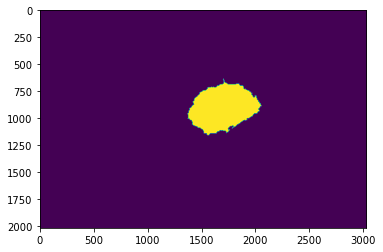

In [85]:
plt.imshow(image)

In [83]:
def get_boundaries(image):
    mask = np.where(image == 1)
    left = min(mask[1])
    right = max(mask[1])
    upper = min(mask[0])
    lower = max(mask[0])
    return upper, lower, left, right

def get_center(image):
    up, dw, lt, rt = get_boundaries(image)
    center = ((up+dw)/2, (lt+rt)/2)
    return center
    
def zoom(image):
    up, dw, lt, rt = get_boundaries(image)
    rectangle = image[up:dw+1, lt:rt+1]
    return rectangle

def cuts(image):
    center = get_center(image)
    if center[0].is_integer():
        upside = image[:center[0]+1,:]
    downside = image[center[0]:,:]
    leftside = image[:,:center[1]+1]
    rightside = image[:,center[1]:]
    return upside, downside, leftside, rightside


def test_symmetry(image, show=False):

    img = []
    symmetries = []
    
    for deg in range(0,90, 30):
        rot_image = skimage.transform.rotate(image, deg)
        z = zoom(rot_image)
        
        upside, downside, leftside, rightside = cuts(z)

        up_dw = np.sum(np.bitwise_and(upside.astype(int), np.flipud(downside).astype(int))) /\
        np.sum(np.bitwise_or(upside.astype(int), np.flipud(downside).astype(int)))

        lt_rt = np.sum(np.bitwise_and(leftside.astype(int), np.fliplr(rightside).astype(int))) /\
        np.sum(np.bitwise_or(leftside.astype(int), np.fliplr(rightside).astype(int)))
    
        symmetries.append((up_dw+lt_rt)/2)
        img.append(z)
    
    symmetry = max(symmetries)
    
    if show:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,12), dpi=350)
        ax1.imshow(upside)
        ax2.imshow(downside)
        ax3.imshow(leftside)
        ax4.imshow(rightside)

        print(f'Up/Down Symmetry: {up_dw:.2%}')
        print(f'Left/Right Symmetry: {lt_rt:.2%}')
    
    else:
        return symmetry
    


(521, 688)

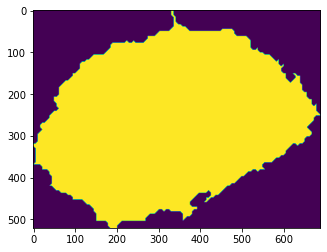

In [110]:
z = zoom(image)
a, b, c, d = cuts(z)
plt.imshow(z)
z.shape

(521, 345)

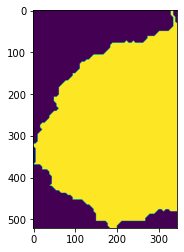

In [108]:
plt.imshow(c)
c.shape


(521, 344)

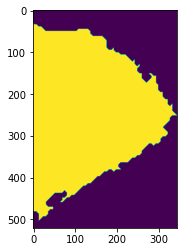

In [109]:
plt.imshow(d)
d.shape

In [80]:
symmetries = {}
for f in os.listdir(SEG_PATH)[:10]:
    if f.endswith('.png'):
        image = plt.imread(SEG_PATH+f)
        symmetries[f] = test_symmetry(image)
    

ValueError: operands could not be broadcast together with shapes (560,289) (560,290) 

In [74]:
symmetries

{}